# Any animal except...

[Project extensions are at the bottom of this file]

During the global exploration of the British empire from 1750 to 1835, many animals were brought back and exhibited to the English public for the first time. These "exotic" creatures were showcased and traded in precursors to zoos, known as menageries.

In this project we will investigate how British menageries affected the usage frequency for different animal words.

We will use the `plot_animal()` function we developed in the previous project:

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-word-trends-menageries.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

word_trends = pd.read_csv('animal-word-trends-menageries.csv')

def plot_menagerie_animal( animal ):
    plt.figure(figsize=(8, 3))
    trend = word_trends.query("word == @animal")
    plt.plot(trend['year'], trend['frequency'], label=animal)
    plt.ylabel('Frequency per million')
    plt.title(f'The menagerie period and word frequency for "{animal}"')
    plt.axvspan(1750, 1835, color='magenta', label='Menagerie Period', alpha=0.2)


## Menagerie animals
The following were some of the more popular exotic animals exhibited in British menageries:

- tiger
- hyena
- tapir
- toucan
- macaw
- ostrich

Explore the usage trends for each of these animal words. We will use `axvspan()` to draw a pink span for the menagerie period from 1750 to 1835.

Activity Goal:
- Explore exotic animal words during the menagerie period.

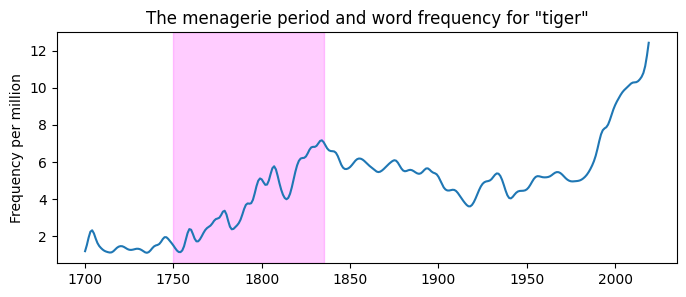

In [3]:
plot_menagerie_animal('tiger')
# try 'tiger', 'hyena', 'tapir', 'toucan', 'macaw', 'ostrich'

What is similar about the trends for these animal words during the marked menagerie period?

Observations:

### Difficult animals
There were other animals that menageries wanted to exhibit, but were too difficult to keep in captivity. Examples include:

- hummingbird
- chimpanzee
- meerkat
- penguin

These animals were difficult to feed, susceptible to diseases, and challenging to raise in captivity. As a result, they rarely appeared in menageries. How did this scarcity affect usage trends for these animal words?

Activity Goal:
- Explore trends for animals that were difficult for menageries.

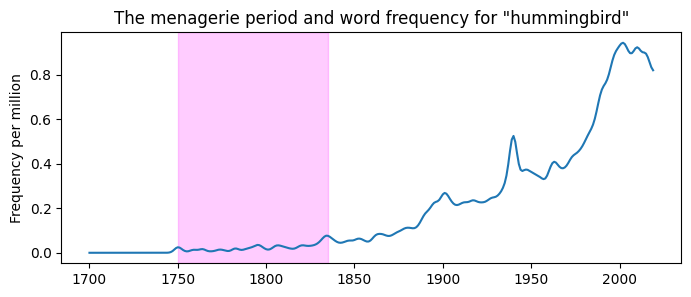

In [4]:
plot_menagerie_animal('hummingbird')
# try 'hummingbird', 'chimpanzee', 'meerkat', 'penguin'

How did the trends for these animal words compare to the previous group?

Observations:

### Explanatory mechanism
We just observed two different trends for exotic animals:

- Exhibited animals showed an increase in word mentions during the menagerie period.
- Non-exhibited animals showed little change in word mentions during the same period.

A good data story conveys not just what happened, but also provides an explanation for why it might have happened.

Provide an explanatory mechanism for the differences in the trends for the two groups of exotic animals.

Explanation:

### Australian Animals
We have a hypothesis to explain differences in word frequency trends for different exotic animals. Let's test this hypothesis for another group of animals.

Starting in the 1780s, menageries began importing exotic animals from Australia in high numbers. Using your hypothesis from above, predict which of these Australian animals was the most difficult for menageries to acquire and exhibit.

Activity Goal:
- Predict which Australian animal was most difficult for menageries.

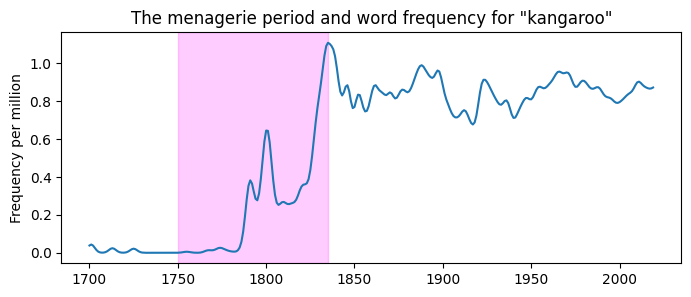

In [5]:
plot_menagerie_animal('kangaroo')
# try 'kangaroo', 'koala', 'wombat'

Which Australian animal do you predict was most difficult for menageries to exhibit?

Prediction:

### Finicky koalas

Since koalas are very finicky and only eat certain kinds of eucalyptus leaves, they were difficult to feed outside of Australia. In fact, Charles Jamarach, a prolific animal trader of the period, famously boasted he could supply menageries with "any animal except a koala."

## Project extensions

Below are a few ideas for extensions. 

1. Convert your findings into a research report examining how British menageries influenced the word frequency for different animal words.

2. Investigate the word usage patterns of additional animals featured in menageries or those deemed too challenging to maintain in captivity. You can utilize the complete dataset (`animal-word-trends.csv`) for a comprehensive analysis.

In [6]:
# YOUR CODE HERE (add new cells as needed)